<a href="https://colab.research.google.com/github/NikolaZubic/AppliedGameTheoryHomeworkSolutions/blob/main/domaci6_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEDMI DOMAĆI ZADATAK iz predmeta "Primenjena teorija igara" (Applied Game Theory)

b) Simulacija evolutivne igre koja u osnovi ima igru "Papir-Bunar-Makaze". Rađeno je po uzoru na rad: [arXiv](https://arxiv.org/abs/1502.03370) jer te replikatorske-mutacione jednačine imaju još parametara pa su u stanju da dobiju suptilnije/bolje riješenje (imaju više informacija).

# Potrebni import-i

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

# Izračunavanje fitnes funkcije

In [ ]:
def calculate_average_fitness_function(x, y, z, eps):
    """
    Calculate average fitness function in the whole population for given population densities.
    Three strategies: {"Rock", "Paper", "Scissors"}

    :param x: part of population that plays first strategy - Rock
    :param y: part of population that plays second strategy - Paper
    :param z: part of population that plays third strategy - Scissors
    :param eps: magnitude of loss in a non-zero sum game
    :return: weighted average fitness in the whole population
    """
    x_fitness = z - y * (eps + 1)
    y_fitness = x - z * (eps + 1)
    z_fitness = y - x * (eps + 1)

    # p refers to the weighted average of the functions
    p = x * x_fitness + y * y_fitness + z * z_fitness

    return p

# Replikatorsko-mutacione jednačine koje se tiču promjena x i y 

Dinamiku sistema je moguće uzeti u obzir samo ako gledamo x i y, jer se z može predstaviti kao 1 - x - y.

In [ ]:
def fitness_x(x, y, eps):
    a = 1 - x - y * (eps + 2)
    return a


def x_dot(x, y, z, eps, phi, mu):
    fx = fitness_x(x, y, eps)

    change_x = x * (fx - phi) + mu * (-2 * x + y + z)

    return change_x


def fitness_y(x, y, eps):
    a = x * (eps + 2) + (y - 1) * (eps + 1)
    return a


def y_dot(x, y, z, eps, phi, mu):
    fy = fitness_y(x, y, eps)

    change_y = y * (fy - phi) + mu * (-2 * y + x + z)

    return change_y

# Glavni program

In [ ]:
if __name__ == "__main__":
    x = 0
    y = 0.8
    z = 0.2

    eps = 1
    mu = 0.1  # mutation rate

    n = 0

    transformation_matrix = np.array([
        [1, 0.5],
        [0, sqrt(3) / 2]
    ])
    initial = np.array([
        [x],
        [y]
    ])

    initial_points = transformation_matrix * initial
    print("Initial points:")
    print(initial_points)
    print("\n")

    while n < 30:
        ph = calculate_average_fitness_function(x, y, z, eps)
        dX = x_dot(x, y, z, eps, ph, mu)
        dY = y_dot(x, y, z, eps, ph, mu)

        x = x + dX * 0.01
        y = y + dY * 0.01
        z = 1 - x - y

        original = np.array([[x], [y]])

        new_points = transformation_matrix * original

        n = n + 0.01

    print("New points:")
    print(new_points)
    print("\n")

Initial points:
[[0.         0.        ]
 [0.         0.69282032]]


New points:
[[0.32803713 0.16401856]
 [0.         0.29260635]]




Vrijednosti new_points u svakoj iteraciji while petlje se mogu i plotovati unutar jednakostraničnog trougla, pa dobijamo:

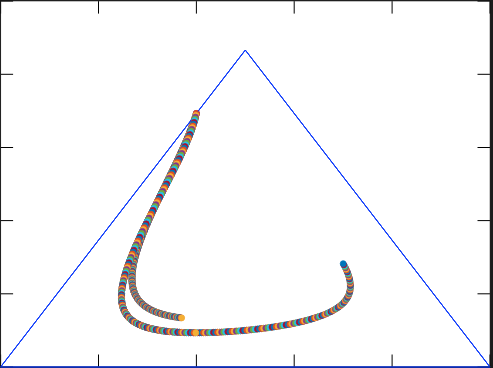